In [59]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from collections import Counter
import os #this to change working directories
import pandas_profiling
from sklearn.base import clone
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
#print(os.getcwd())
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from matplotlib import pyplot
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [60]:
df1=pd.read_csv('./data/borrower_table.csv')
df2=pd.read_csv('./data/loan_table.csv')

In [61]:
df= pd.merge(df1,df2,on=['loan_id'], how='inner')

In [62]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)

# Pre-Processing

In [63]:
df.set_index(['loan_id'], inplace=True)

In [64]:
df.head(5)

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted,loan_repaid
loan_id,,,,,,,,,,,,,,,
289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3,business,2012-01-31,0,NaN
482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1,investment,2012-11-02,0,NaN
135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8,other,2012-07-16,1,1.0
207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1,investment,2012-06-05,0,NaN
828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1,emergency_funds,2012-11-28,0,NaN


In [65]:
df["loan_repaid"].isnull().sum()

53446

In [66]:
df.dropna(subset=["loan_repaid"], inplace=True)

In [67]:
df.head(10)

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted,loan_repaid
loan_id,,,,,,,,,,,,,,,
135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8,other,2012-07-16,1,1.0
423171,1,NaN,NaN,6100,0.53,6163,5298,1,29500,24,1,other,2012-11-07,1,1.0
200139,1,NaN,NaN,4000,0.57,602,2757,1,31700,36,8,business,2012-09-19,1,0.0
991294,0,1.0,0.0,7000,0.52,2575,2917,1,58900,33,3,emergency_funds,2012-12-04,1,1.0
875332,0,1.0,0.0,4300,0.83,722,892,1,5400,32,7,business,2012-01-20,1,1.0
954215,1,NaN,NaN,7000,0.64,2113,5589,0,0,40,2,business,2012-08-09,1,1.0
778076,1,NaN,NaN,4900,0.60,460,4297,1,26600,53,3,business,2012-05-10,1,1.0
73441,0,1.0,0.0,3900,0.77,989,1547,1,45700,29,4,emergency_funds,2012-11-08,1,1.0
249377,1,NaN,NaN,5500,0.59,1154,2731,1,9300,51,2,business,2012-09-18,1,1.0


Positive examples = 30706
Negative examples = 16948
Proportion of positive to negative examples = 55.19%


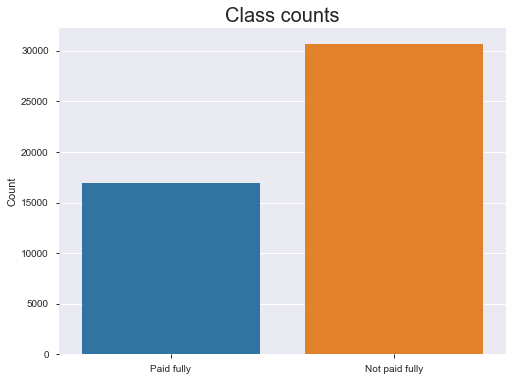

In [68]:
# Get number of positve and negative examples
pos = df[df["loan_repaid"] == 1].shape[0]
neg = df[df["loan_repaid"] == 0].shape[0]
print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(neg/pos) * 100:.2f}%")
plt.figure(figsize=(8, 6))
sns.countplot(df["loan_repaid"])
plt.xticks((0, 1), ["Paid fully", "Not paid fully"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

In [69]:
#Drop Loan_granted and Date
df.drop(["loan_granted","date"], axis='columns', inplace=True)

In [70]:
#list of conditions(1=Other, 2=Emergency_funds, 3=Business, 4= Home, 5= Investment)
conditions = [
    (df['loan_purpose'] == "other"),
    (df['loan_purpose'] == "emergency_funds"),
    (df['loan_purpose'] == "business"),
    (df['loan_purpose'] == "home"),
    (df['loan_purpose'] == "investment"),
    ]

In [71]:
# create a list of the values we want to assign for each condition
values = [1, 2, 3, 4, 5]


In [72]:
# create a new column and use np.select to assign values to it using our lists as arguments
df['loan_purpose'] = np.select(conditions, values)

In [73]:
#Fill NA
df['fully_repaid_previous_loans'] = df['fully_repaid_previous_loans'].fillna(0)
df['currently_repaying_other_loans'] = df['currently_repaying_other_loans'].fillna(0)
df['avg_percentage_credit_card_limit_used_last_year'] = df['avg_percentage_credit_card_limit_used_last_year'].fillna(0)

In [74]:
#Change to integers only
#df.astype(int)
df.loan_repaid = df.loan_repaid.apply(int) # round instead of int is you prefer to round
df.fully_repaid_previous_loans = df.fully_repaid_previous_loans.apply(int) 
df.currently_repaying_other_loans = df.currently_repaying_other_loans.apply(int) 


In [75]:
#df.drop(["is_employed", "avg_percentage_credit_card_limit_used_last_year", "fully_repaid_previous_loans", "currently_repaying_other_loans"], axis='columns', inplace=True)
df.drop(["is_employed", "avg_percentage_credit_card_limit_used_last_year", "fully_repaid_previous_loans"], axis='columns', inplace=True)

In [76]:
df.head(5)

,is_first_loan,currently_repaying_other_loans,total_credit_card_limit,saving_amount,checking_amount,yearly_salary,age,dependent_number,loan_purpose,loan_repaid
loan_id,,,,,,,,,,
135565,1,0,6900,2085,3422,24500,38,8,1,1
423171,1,0,6100,6163,5298,29500,24,1,1,1
200139,1,0,4000,602,2757,31700,36,8,3,0
991294,0,0,7000,2575,2917,58900,33,3,2,1
875332,0,0,4300,722,892,5400,32,7,3,1


# PREDICTIVE MACHINE LEARNING MODEL

In [77]:
X = df.copy(deep=True)

In [78]:
y = X.pop('loan_repaid')
count = y.count()
print(np.count_nonzero(y < 1))
print(np.count_nonzero(y >= 1))

16948
30706


In [79]:
ss= StandardScaler()
X= ss.fit_transform(X)

Text(0.5, 1, 'Heatmap of correlation')

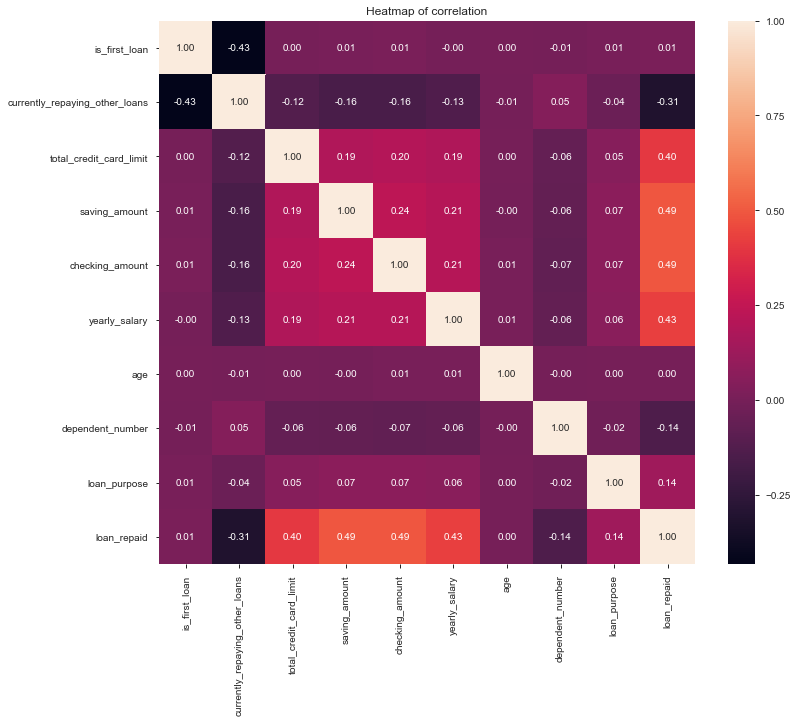

In [80]:
corr = df.corr()
plt.figure(figsize=(12,10))
heat=sns.heatmap(data=corr, annot=True, fmt=".2f")
plt.title('Heatmap of correlation')

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size = .20)

In [82]:
count = y_train.count()
print(np.count_nonzero(y_train < 1))
print(np.count_nonzero(y_train >= 1))

13513
24610


In [83]:
#SMOTE resmapling
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)
print('smote target shape %s' % Counter(y_resampled))

smote target shape Counter({0: 24610, 1: 24610})


In [84]:
X_resampled, X_val, y_resampled, y_val = train_test_split(
    X_resampled, y_resampled, test_size=0.25, random_state=42)

# CREATE THE MODEL (without tuning)

In [85]:
model= SVC(random_state=42).fit(X_resampled, y_resampled)

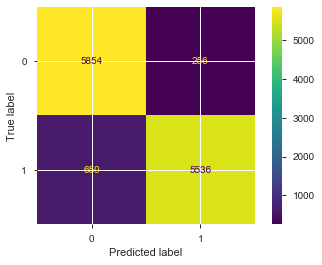

In [28]:
plot_confusion_matrix(model, X_val, y_val, values_format='')

In [32]:
# predict the training data
y_pred= model.predict(X_val)

In [33]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      6110
           1       0.96      0.89      0.92      6195

    accuracy                           0.93     12305
   macro avg       0.93      0.93      0.93     12305
weighted avg       0.93      0.93      0.93     12305



In [34]:
print("Accurcay",accuracy_score(y_val, y_pred))
print("Precision", precision_score(y_val, y_pred))
print("Recall",recall_score(y_val, y_pred))
print("F1 score",f1_score(y_val, y_pred))

Accurcay 0.9256399837464445
Precision 0.9558011049723757
Recall 0.8936238902340597
F1 score 0.9236673062484358


In [35]:
print("Accuracy on training set before tuning: {:.3f}".format(model.score(X_resampled,y_resampled)))

Accuracy on training set before tuning: 0.929


# Tuning the hyperparameters

In [93]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [94]:
model = SVC(random_state=42)

In [95]:
param_dict = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [96]:
grid = GridSearchCV(model, param_dict,cv=10, verbose = 1, n_jobs=-1 ) #refit = True,
grid.fit(X_resampled, y_resampled)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 58.3min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [97]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [98]:
grid.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [99]:
grid.best_score_

0.9318164986836592

In [100]:
df2 = pd.DataFrame(grid.cv_results_)
df2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,65.946952,4.956849,3.080360,0.151633,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.914951,0.913868,0.921723,0.917660,0.921181,0.924682,0.920076,0.924953,0.920618,0.922243,0.920195,0.003527,11
1,21.201564,0.711193,1.241493,0.115456,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.917389,0.914680,0.920368,0.914680,0.917118,0.927120,0.914928,0.927120,0.920076,0.919534,0.919301,0.004408,12
2,25.097465,1.406449,1.498207,0.035056,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.903575,0.905471,0.904930,0.898429,0.907367,0.912219,0.906258,0.915199,0.906529,0.911135,0.907111,0.004518,17
3,38.819265,1.355566,2.584656,0.185805,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.899512,0.900054,0.897075,0.890033,0.900054,0.903007,0.898672,0.908155,0.898943,0.902195,0.899770,0.004369,24
4,86.899927,2.129050,4.801747,0.400729,0.1,0.0001,rbf,"{'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.884615,0.881365,0.876490,0.871614,0.884886,0.882146,0.883500,0.894879,0.883229,0.885126,0.882785,0.005719,25


In [102]:
df2[["param_C","param_gamma", "params", "mean_test_score", "std_test_score"]].sort_values(by=['mean_test_score'],ascending=False).head(3)

,param_C,param_gamma,params,mean_test_score,std_test_score
5,1,1,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.931816,0.003541
11,10,0.1,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.928078,0.002533
10,10,1,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}",0.927861,0.003943


In [47]:
model = SVC(C=1, gamma=1, kernel='rbf', random_state=42)

In [48]:
# Train SVM
clf= model.fit(X_resampled, y_resampled)
print("Accuracy on training set after tuning: {:.3f}".format(model.score(X_resampled,y_resampled)))

Accuracy on training set after tuning: 0.959


In [49]:
y_pred= model.predict(X_val)

In [50]:
print("Accurcay",accuracy_score(y_val, y_pred))
print("Precision", precision_score(y_val, y_pred))
print("Recall",recall_score(y_val, y_pred))
print("F1 score",f1_score(y_val, y_pred))

Accurcay 0.9321414059325478
Precision 0.9543913190912173
Recall 0.90863599677159
F1 score 0.9309517902919044


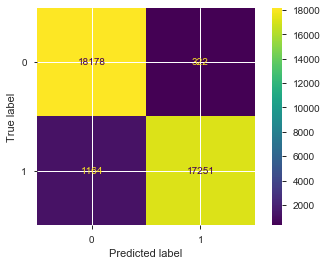

In [131]:
plot_confusion_matrix(model, X_val, y_val, values_format='')

In [ ]:
‰

# Testdata without tuning

In [51]:
model = SVC(random_state=42).fit(X_resampled, y_resampled)

In [52]:
y_pred= model.predict(X_test)

In [53]:
print("Accurcay",accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("F1 score",f1_score(y_test, y_pred))


Accurcay 0.9175322631413283
Precision 0.9714133522727273
Recall 0.8974737532808399
F1 score 0.932980900409277


# Test the model

In [54]:
model = SVC(C=1, gamma=1, kernel='rbf', random_state=42).fit(X_resampled, y_resampled)


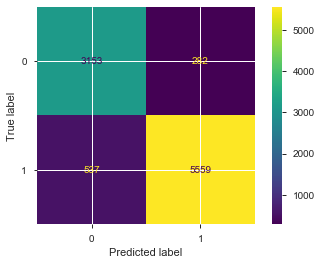

In [55]:
plot_confusion_matrix(model, X_test, y_test, values_format='')

In [56]:
#predict the test data
y_pred= model.predict(X_test)

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      3435
           1       0.95      0.91      0.93      6096

    accuracy                           0.91      9531
   macro avg       0.90      0.91      0.91      9531
weighted avg       0.92      0.91      0.91      9531



In [58]:
print("Accurcay",accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))
print("Recall",recall_score(y_test, y_pred))
print("F1 score",f1_score(y_test, y_pred))


Accurcay 0.9140698772426817
Precision 0.9517205957883924
Recall 0.9119094488188977
F1 score 0.9313897964312642
